In [1]:
%matplotlib inline

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import gc

/Users/jeremy/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)  # size reduced
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)  # (4, 4, 8)
x = UpSampling2D((2, 2))(x)  # (8, 8, 8)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)  # (14, 14, 16)
x = UpSampling2D((2, 2))(x)  # (28, 28, 16)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # (28, 28, 1)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [7]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1346 - val_loss: 0.1312
Epoch 2/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1298 - val_loss: 0.1249
Epoch 3/50
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1257 - val_loss: 0.1239
Epoch 4/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1225 - val_loss: 0.1227
Epoch 5/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1204 - val_loss: 0.1191
Epoch 6/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1183 - val_loss: 0.1156
Epoch 7/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1168 - val_loss: 0.1142
Epoch 8/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1156 - val_loss: 0.1148
Epoch 9/50
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1146 - val_loss: 0.1146
Epoch

In [8]:
gc.collect()

0

In [10]:
import matplotlib.pyplot as plt

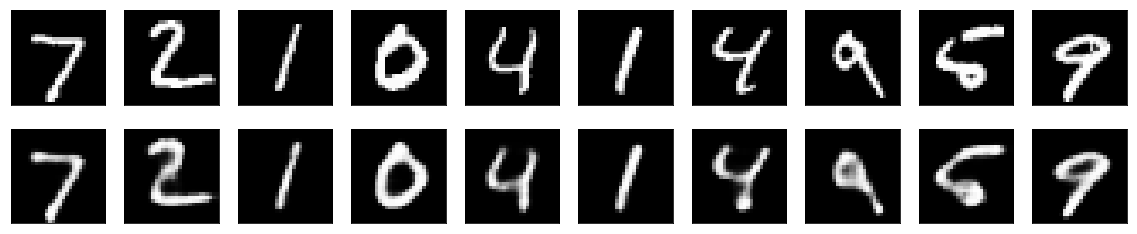

In [11]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

##### BETTER